<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Air-route-network-exploration" data-toc-modified-id="Air-route-network-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Air route network exploration</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Handling missing values</a></span></li><li><span><a href="#Handling-duplicate-lines" data-toc-modified-id="Handling-duplicate-lines-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Handling duplicate lines</a></span></li><li><span><a href="#Preprocess" data-toc-modified-id="Preprocess-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Preprocess</a></span></li><li><span><a href="#Creating-the-graphs" data-toc-modified-id="Creating-the-graphs-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Creating the graphs</a></span><ul class="toc-item"><li><span><a href="#Directed-graph" data-toc-modified-id="Directed-graph-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Directed graph</a></span></li><li><span><a href="#Undirected-graph" data-toc-modified-id="Undirected-graph-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>Undirected graph</a></span></li></ul></li></ul></li><li><span><a href="#Basic-statistics" data-toc-modified-id="Basic-statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Basic statistics</a></span></li><li><span><a href="#Degree-Distribution" data-toc-modified-id="Degree-Distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Degree Distribution</a></span><ul class="toc-item"><li><span><a href="#Biggest-airports-(in/out-degrees)" data-toc-modified-id="Biggest-airports-(in/out-degrees)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Biggest airports (in/out degrees)</a></span></li><li><span><a href="#Plot-of-the-(in/out)-degree-distribution" data-toc-modified-id="Plot-of-the-(in/out)-degree-distribution-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Plot of the (in/out)-degree distribution</a></span></li></ul></li><li><span><a href="#Robustness" data-toc-modified-id="Robustness-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Robustness</a></span></li></ul></li></ul></div>

# Air route network exploration

In [178]:
from collections import Counter
import utils

import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd
import numpy as np
import os

In [132]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
path_data = "../data/"

Dataset source: https://openflights.org/data.html

**ROUTES DATASET**
- **Airline** 2-letter (IATA) or 3-letter (ICAO) code of the airline.
- **Airline ID** Unique OpenFlights identifier for airline (see Airline).
- **Source airport** 3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- **Source airport ID** Unique OpenFlights identifier for source airport (see Airport)
- **Destination airport** 3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- **Destination airport ID** Unique OpenFlights identifier for destination airport (see Airport)
- **Codeshare** "Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
- **Stops** Number of stops on this flight ("0" for direct)
- **Equipment** 3-letter codes for plane type(s) generally used on this flight, separated by spaces


**AIRPORTS DATASET**
- **Airport ID** Unique OpenFlights identifier for this airport.
- **Name** Name of airport. May or may not contain the City name.
- **City** Main city served by airport. May be spelled differently from Name.
- **Country** Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
- **IATA** 3-letter IATA code. Null if not assigned/unknown.
- **ICAO** 4-letter ICAO code. Null if not assigned.
- **Latitude**Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- **Longitude** Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- **Altitude** In feet.
- **Timezone** Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- **DST** Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- **Tz database time zone** Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
- **Type** Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
- **Source** Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.

In [197]:
col_names_routes = ["airline", "id_airline", "source_airport", 
             "id_source_airport", "destination_airport",
             "id_destination_airport", "codeshare",
             "stops", "equipment"
            ]

col_names_airports = ["id_airport", "name", "city", 
             "country", "IATA", "ICAO", "latitude",
             "longitude", "altitude", "tz", "dst", "tz_db",
             "type", "source"
            ]

df = pd.read_table(os.path.join(path_data, "routes.dat"),
                   sep=",", names=col_names_routes)

df_airports = pd.read_table(os.path.join(path_data, "airports.dat"),
                   sep=",", names=col_names_airports, index_col=0)

In [198]:
df.head()

airline id_airline source_airport id_source_airport destination_airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  id_destination_airport codeshare  stops equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

In [199]:
df_airports.head()

name          city  \
id_airport                                                              
1                                        Goroka Airport        Goroka   
2                                        Madang Airport        Madang   
3                          Mount Hagen Kagamuga Airport   Mount Hagen   
4                                        Nadzab Airport        Nadzab   
5           Port Moresby Jacksons International Airport  Port Moresby   

                     country IATA  ICAO  latitude   longitude  altitude  tz  \
id_airport                                                                    
1           Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282  10   
2           Papua New Guinea  MAG  AYMD -5.207080  145.789001        20  10   
3           Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388  10   
4           Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239  10   
5           Papua New Guinea  POM  AYPY -9.443380  147.220001       146  10   

           dst                 tz_db     type       source  
id_airport                                                  
1            U  Pacific/Port_Moresby  airport  OurAirports  
2            U  Pacific/Port_Moresby  airport  OurAirports  
3            U  Pacific/Port_Moresby  airport  OurAirports  
4            U  Pacific/Port_Moresby  airport  OurAirports  
5            U  Pacific/Port_Moresby  airport  OurAirports

## Preprocessing

### Handling missing values
The dataset provider indicates that *"the special value \N is used for "NULL" to indicate that no value is available".* We decided to delete the airports for which no id is linked.

In [56]:
# Counting the number of missing id source airports and missing id destination airports
print("#Missing Source IDs: {}".format(len(df[df.id_source_airport == "\\N"])))
print("#Missing Source IDs: {}".format(len(df[df.id_destination_airport == "\\N"])))

#Missing Source IDs: 220
#Missing Source IDs: 221


### Handling duplicate lines

As we do not consider airlines or equipments, we delete duplicate lines (i.e. with same id_source_airport AND id_source_airport).

In [108]:
# Example
df[((df.id_source_airport == "100") & (df.id_destination_airport == "193"))]

airline id_airline source_airport id_source_airport destination_airport  \
8150       AC        330            YOW               100                 YYZ   
36971      KL       3090            YOW               100                 YYZ   
64720      WS       5416            YOW               100                 YYZ   

      id_destination_airport codeshare  stops            equipment  
8150                     193       NaN      0  320 319 E90 763 E75  
36971                    193         Y      0                  737  
64720                    193       NaN      0              736 73W

### Preprocess

In [262]:
def preprocess(df):
    # Delete rows with missing ids
    df_processed = df[((df.id_source_airport != "\\N") & (df.id_destination_airport != "\\N"))]
    
    # Keep only ["id_source_airport", "id_destination_airport"] col
    # And drop duplicates
    df_processed = df_processed[["id_source_airport", 
                       "id_destination_airport"]].drop_duplicates()
    
    # Convert ids to numeric
    df_processed.id_source_airport = df_processed.id_source_airport.map(pd.to_numeric)
    df_processed.id_destination_airport = df_processed.id_destination_airport.map(pd.to_numeric)
    
    return df_processed

In [263]:
df_processed = preprocess(df)
df_processed.shape

(37274, 2)

### Creating the graphs

In [215]:
arr_edges = np.array(df_processed)

In [216]:
arr_edges.shape

(37274, 2)

#### Directed graph

In [217]:
G_dir = nx.DiGraph()
G_dir.add_edges_from(arr_edges)

In [218]:
len(G_dir.edges())

37274

#### Undirected graph

In [287]:
G = nx.Graph()
G.add_edges_from(arr_edges)

In [288]:
len(G.edges())

19079

## Basic statistics

In [219]:
print("#Routes: {}".format(df_processed.shape[0]))
print("#Unique Source Airports: {}".format(df_processed.id_source_airport.nunique()))
print("#Unique Target Airports: {}".format(df_processed.id_destination_airport.nunique()))
nodes = np.unique(np.concatenate([df_processed.id_source_airport, df_processed.id_destination_airport]))
print("#Nodes: {}".format(len(nodes)))

#Routes: 37274
#Unique Source Airports: 3315
#Unique Target Airports: 3321
#Nodes: 3330


## Degree Distribution

In [220]:
# {(id_airport, in_degree)} dict
in_degrees_dic = dict(G_dir.in_degree())
# List of in_degrees
in_degrees_list = in_degrees_dic.values()

# {(id_airport, out_degree)} dict
out_degrees_dic = dict(G_dir.out_degree())
# List of out_degrees
out_degrees_list = out_degrees_dic.values()

### Biggest airports (in/out degrees)

In [221]:
max_in = max(in_degrees_list)
max_out = max(out_degrees_list)

# Find node id with degrees max_in and max_out
max_in_nodes = utils.find_key(in_degrees_dic, max_in)
max_out_nodes = utils.find_key(out_degrees_dic, max_out)

print("Max in-degree (nodes {}): {}".format(max_in_nodes, max_in))
print("Max out-degree (nodes {}): {}".format(max_out_nodes, max_out))

Max in-degree (nodes ['340']): 238
Max out-degree (nodes ['340']): 239


In [271]:
# 6 "biggest" airports regarding out_degree
df_processed.groupby("id_source_airport").count().\
        sort_values("id_destination_airport", ascending=False)[:6].\
        join(df_airports)[["name", "city", "country", "IATA"]]

name  \
id_source_airport                                                     
340                         Frankfurt am Main International Airport   
1382                        Charles de Gaulle International Airport   
580                                      Amsterdam Airport Schiphol   
1701                                  Atatürk International Airport   
3682               Hartsfield Jackson Atlanta International Airport   
3364                          Beijing Capital International Airport   

                        city        country IATA  
id_source_airport                                 
340                Frankfurt        Germany  FRA  
1382                   Paris         France  CDG  
580                Amsterdam    Netherlands  AMS  
1701                Istanbul         Turkey  IST  
3682                 Atlanta  United States  ATL  
3364                 Beijing          China  PEK

In [272]:
# 6 "biggest" airports regarding in_degree
df_processed.groupby("id_destination_airport").count().\
        sort_values("id_source_airport", ascending=False)[:6].\
        join(df_airports)[["name", "city", "country", "IATA"]]

name  \
id_destination_airport                                                     
340                              Frankfurt am Main International Airport   
1382                             Charles de Gaulle International Airport   
580                                           Amsterdam Airport Schiphol   
1701                                       Atatürk International Airport   
3682                    Hartsfield Jackson Atlanta International Airport   
3364                               Beijing Capital International Airport   

                             city        country IATA  
id_destination_airport                                 
340                     Frankfurt        Germany  FRA  
1382                        Paris         France  CDG  
580                     Amsterdam    Netherlands  AMS  
1701                     Istanbul         Turkey  IST  
3682                      Atlanta  United States  ATL  
3364                      Beijing          China  PEK

### Plot of the (in/out)-degree distribution

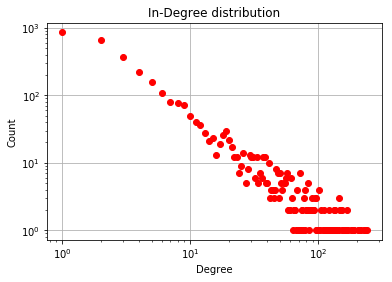

In [280]:
utils.plot_distribution(G_dir, what="in", title="In-Degree distribution")

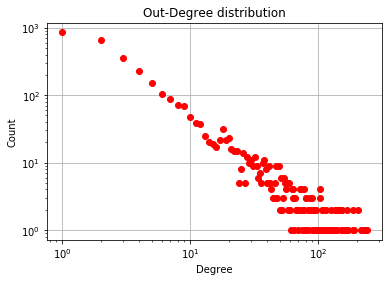

In [281]:
utils.plot_distribution(G_dir, what="out", title="Out-Degree distribution")

## Robustness

In [295]:
gcc = max(nx.connected_component_subgraphs(G), key=len)
(props, Y_random, Y_target) = utils.create_features_for_plot(0, 0.2, 10, gcc)

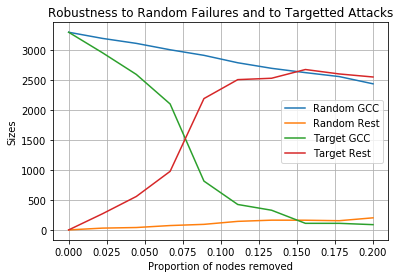

In [297]:
utils.plot_robustness(props, Y_random, Y_target)